# check dataloader

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import sys

sys.path.append("/kaggle/src/data/")
from dss_dataloader import DSSAddRolldiffDataset, DSSDataset, DSSEventDataset,DSSMeanStdsDataset, DSSDownSampleDataset, DSSTargetDownsampleDataset, DSSTargetDownsampleEventDataset, DSSTargetDownsample3chDataset


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)


In [4]:
# series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_le_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_6ch_lepseudo_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/downsample_train_series_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/downsample_train_series_fold_zerosec.parquet")
# series_df = pd.read_parquet("/kaggle/input/targetdownsample_train_series_fold.parquet")
# series_df = pd.read_parquet("/kaggle/input/targetdownsample_train_series_fold.parquet")
series_df = pd.read_parquet("/kaggle/input/targetdownsample_train_series_hour_fold.parquet")
print(series_df.columns)
# series_df = pd.read_parquet("/kaggle/input/targetdownsample_train_series_event3ch.parquet")
key_df = series_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)


Index(['series_id', 'step', 'anglez', 'enmo', 'second', 'minute', 'hour',
       'date', 'anglez_mean_36', 'anglez_std_36', 'anglez_mean_60',
       'anglez_std_60', 'event', 'event_onset', 'event_wakeup',
       'series_date_key', 'series_date_key_str', 'fold'],
      dtype='object')


In [5]:
%%time
# target が1chのとき

# dataset = DSSTargetDownsampleDataset(key_df, series_df)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
# print(len(dataset))
# show_idx = 1
# for idx, (input, target, input_info) in enumerate(dataloader):
#     print(idx)
#     # if idx < show_idx:
#     #     continue
#     if idx > show_idx:
#         break
#     plt.figure(figsize=(10, 5))
#     plt.subplot(3, 1, 1)
#     plt.plot(input[0, 0, :].numpy(), label="anglez")
#     plt.legend()
#     plt.subplot(3, 1, 2)
#     plt.plot(input[0, 1, :].numpy(), label="enmo")
#     plt.legend()
#     plt.subplot(3, 1, 3)
#     plt.plot(target[0, 0, :].numpy(), label="class_pred")
#     plt.show()


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs


4815
0


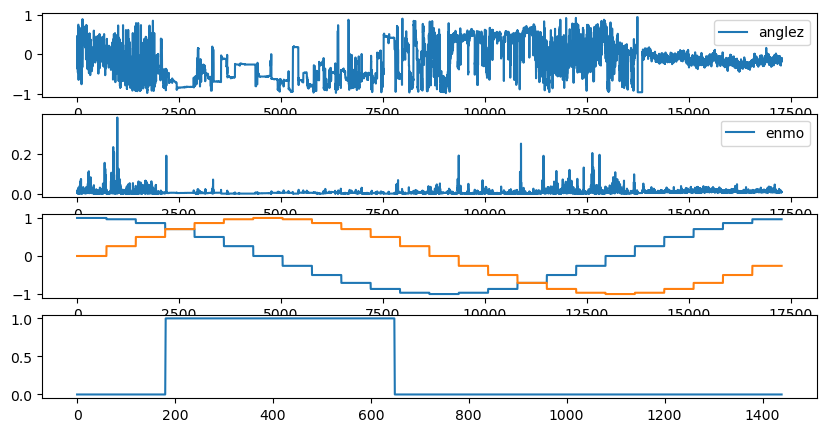

1


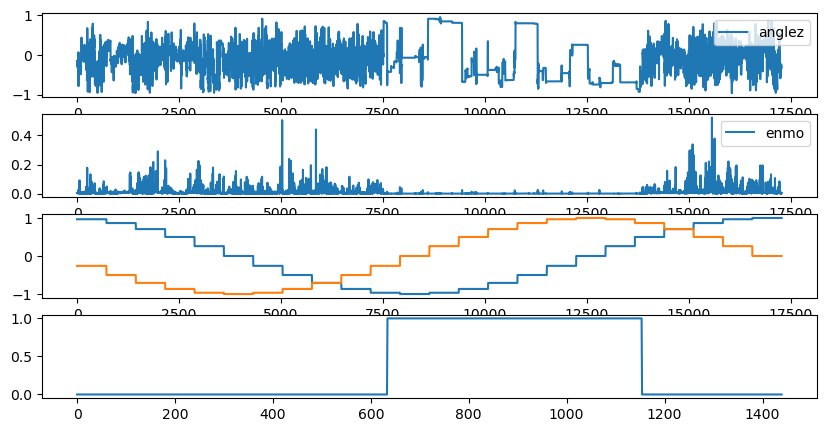

2


In [6]:
dataset = DSSTargetDownsampleDataset(key_df, series_df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
print(len(dataset))
show_idx = 1
for idx, (input, target, input_info) in enumerate(dataloader):
    print(idx)
    # if idx < show_idx:
    #     continue
    if idx > show_idx:
        break
    plt.figure(figsize=(10, 5))
    plt.subplot(4, 1, 1)
    plt.plot(input[0, 0, :].numpy(), label="anglez")
    plt.legend()
    plt.subplot(4, 1, 2)
    plt.plot(input[0, 1, :].numpy(), label="enmo")
    plt.legend()
    plt.subplot(4, 1, 3)
    plt.plot(input[0, -1, :].numpy(), label="hoursin")
    plt.plot(input[0, -2, :].numpy(), label="hourcos")
    plt.subplot(4, 1, 4)
    plt.plot(target[0, 0, :].numpy(), label="class_pred")
    plt.show()


In [7]:

# dataset = DSSTargetDownsampleEventDataset(key_df, series_df)
# dataset = DSSTargetDownsample3chDataset(key_df, series_df)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
# print(len(dataset))
# show_idx = 1
# for idx, (input, target, input_info) in enumerate(dataloader):
#     print(idx)
#     # if idx < show_idx:
#     #     continue
#     if idx > show_idx:
#         break
#     plt.figure(figsize=(10, 5))
#     plt.subplot(5, 1, 1)
#     plt.plot(input[0, 0, :].numpy(), label="anglez")
#     plt.legend()
#     plt.subplot(5, 1, 2)
#     plt.plot(input[0, 1, :].numpy(), label="enmo")
#     plt.legend()
#     plt.subplot(5, 1, 3)
#     plt.plot(target[0, 0, :].numpy(), label="event_onset")
#     plt.subplot(5, 1, 4)
#     plt.plot(target[0, 1, :].numpy(), label="event_wakeup")
#     plt.subplot(5, 1, 5)
#     plt.plot(target[0, 2, :].numpy(), label="class")
#     # plt.show()


In [8]:
# for idx, (input, target, input_info) in enumerate(dataloader):
#     if torch.isnan(input).any():
#         print(idx)
#         print(input)
#         break
#     elif torch.isnan(target).any():
#         print(idx)
#         print(target)
#         break
#     # print(input_info)
